<a href="https://colab.research.google.com/github/Harshithaaramesh/Datascience/blob/main/NumberRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train , y_train) , (x_test, y_test) = keras.datasets.mnist.load_data() #import data from mnist

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape #checking the indivisual sample image pixels

(28, 28)

In [ ]:
x_train[0] #checking dimesional its in 2 dimesinal

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# accuarcy of the training set is not better to improve the accuarcy we scale down our features
 # image range from 0 to 255 , we have divide each pixels of the images by 255 the featuers are scale down.

x_train = x_train/255
x_test = x_test/255

#print(x_train)
#print(x_test)

x_train[0] # values are scale down between 0 to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

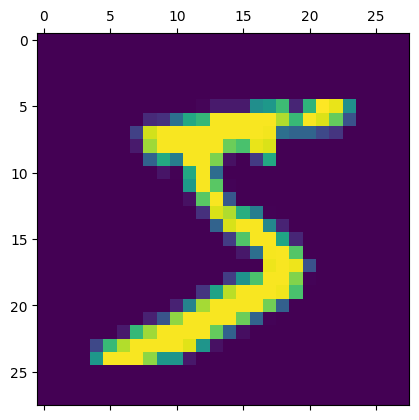

In [ ]:
plt.matshow(x_train[0])# visualising the first training dataset image

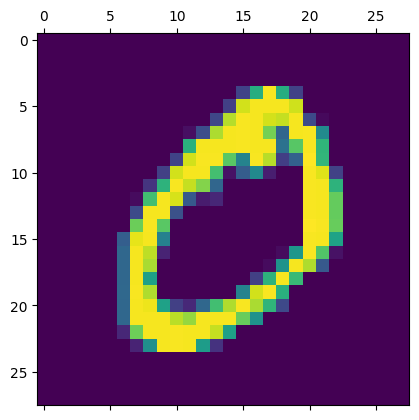

In [ ]:
plt.matshow(x_train[1]) #these are clearly handwritten images

In [ ]:
y_train[1]   #checking y_train[1] containg which number,it containg 0 .

0

In [ ]:
y_train[:5]     #checking upto 5

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
#we have to flatten the training dataset.
#it means coverting 2 dimensionality into 1 dimensional for flatting we have pandas techinque reshape


print(x_train.shape) # before shape


x_train_flattaned = x_train.reshape(len(x_train),28*28) # reshaping x_train
print(x_train_flattaned )

x_test_flattaned = x_test.reshape(len(x_test),28*28) #reshaping x_test
print(x_test_flattaned )

(60000, 28, 28)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
x_train_flattaned.shape

(60000, 784)

In [ ]:
x_test_flattaned.shape

(10000, 784)

In [ ]:
#Creating neural network, which having only two layers.
# first layer is input layer having 784 inputs.
# second layer is ouput layer having 10 elements(10 to 9)


model = keras.Sequential([                            #sequential means , having the stack of layers in the neural network
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #10 outputs ,784 inputs,dense means number nuerons

])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )
model.fit(x_train_flattaned , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4791 - accuracy: 0.8733
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2669 - accuracy: 0.9259


In [ ]:
model.evaluate(x_test_flattaned , y_test )

313/313 [==============================] - 1s 1ms/step - loss: 0.2684 - accuracy: 0.9242


[0.26839372515678406, 0.9241999983787537]

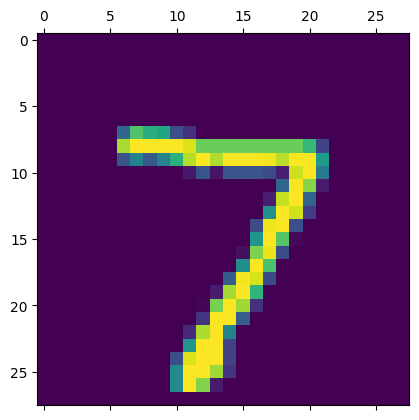

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flattaned)
y_predicted[0] # we get 10outputs which is the highest vale

313/313 [==============================] - 1s 2ms/step


array([1.9662982e-02, 3.6774244e-07, 6.9962919e-02, 9.5360506e-01,
       2.6813298e-03, 1.0456640e-01, 8.5245676e-07, 9.9978483e-01,
       1.1361285e-01, 6.1103517e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
# confusion matrix

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    6,    7,    3,    3,    1],
       [   0, 1116,    2,    2,    0,    1,    4,    2,    8,    0],
       [   4,   15,  906,   22,    8,    4,   12,   11,   47,    3],
       [   2,    0,   13,  936,    1,   17,    2,   12,   21,    6],
       [   1,    1,    7,    1,  928,    0,    7,    4,   11,   22],
       [   8,    3,    3,   39,   11,  764,   10,    8,   40,    6],
       [  11,    3,    7,    1,    7,   15,  907,    2,    5,    0],
       [   1,   10,   19,    6,    7,    1,    0,  953,    4,   27],
       [   4,    9,    5,   21,    9,   19,    8,   10,  884,    5],
       [   9,    7,    2,   12,   40,    6,    0,   30,   12,  891]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

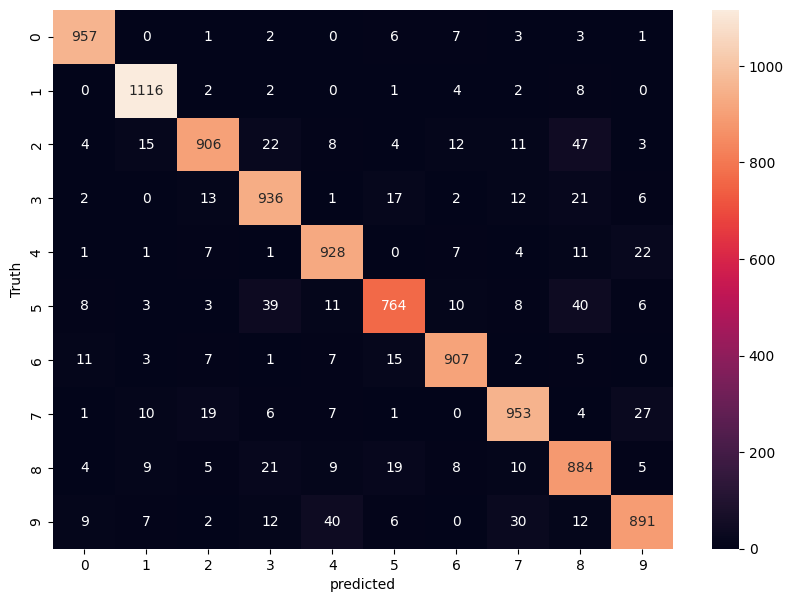

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
# creating hidden layer


model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #hidden layer
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )
model.fit(x_train_flattaned , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2690 - accuracy: 0.9256
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1216 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0520 - accuracy: 0.9842


In [ ]:
model.evaluate(x_test_flattaned , y_test )

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9780


[0.0759265273809433, 0.9779999852180481]

In [ ]:
y_predicted = model.predict(x_test_flattaned)
y_predicted[0] # we get 10outputs which is the hihest vale

313/313 [==============================] - 0s 1ms/step


array([6.27018465e-03, 1.02630205e-04, 1.82130724e-01, 8.59692991e-01,
       3.43982106e-06, 2.50471733e-03, 3.59400119e-08, 9.99838889e-01,
       1.04685232e-01, 1.38400570e-01], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

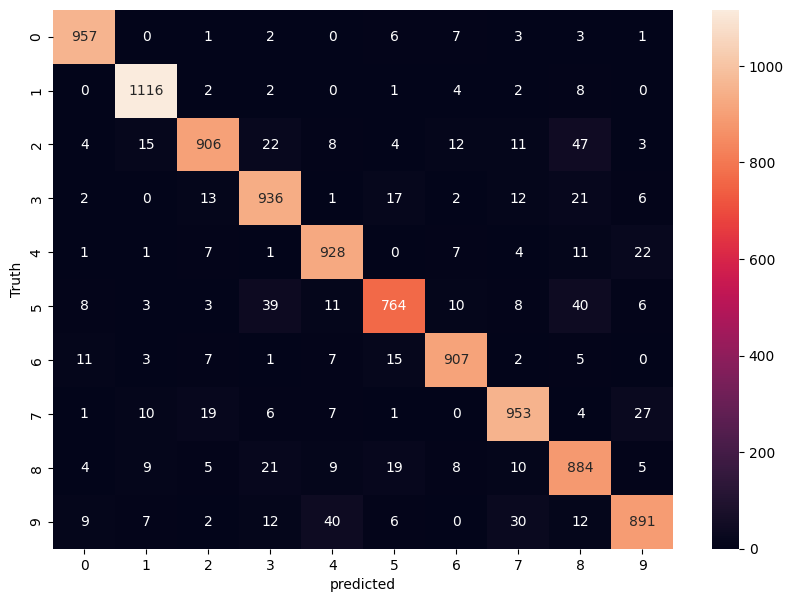

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')